<a href="https://www.kaggle.com/code/mohanrajharitha/lung-cancer-patient-dataset-analysis?scriptVersionId=239975914" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-dataset/dataset_med.csv


**INTRODUCTION**

The analysis delved into a medical dataset to uncover patterns and insights regarding patient demographics, medical history, treatments, and survival outcomes. The data was first cleaned and organized, addressing inconsistencies such as missing values and ensuring proper formatting of date and numerical fields. Exploratory data analysis revealed significant trends: for instance, survival rates were strongly influenced by factors such as cancer stage, smoking status, and treatment type. Visualizations highlighted the distributions of age, BMI, and cholesterol levels, as well as the correlations between numerical variables and survival outcomes. Key categorical factors like gender, family history, and smoking habits were also analyzed, revealing imbalances and unique trends. The analysis underscored the critical role of early detection and lifestyle factors in improving survival rates, providing a foundation for deeper modeling or actionable insights in patient care.


**Importing libraries and collecting data**

In [2]:
import matplotlib.pyplot as plt  #plotting
import seaborn as sns  #data visualization

#supress warning for clear output
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv('/kaggle/input/lung-cancer-dataset/dataset_med.csv')

**Understanding the dataset**

In [4]:
data.shape

(890000, 17)

In [5]:
data.head()

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [7]:
data['age'] = data['age'].astype(int)

In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  int64  
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [9]:
data.isnull().sum()

id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

Exploratory data analysis shows that cancer remains a significant global health challenge. Survival rates vary due to numerous factors such as gender, cancer stage, lifestyle habits, and treatment options. Analyzing these factors provides valuable insights for improving early detection and optimizing treatment strategies.

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,890000.0,445000.500000,256921.014128,1.0,222500.75,445000.5,667500.25,890000.0
age,890000.0,55.007008,9.994485,4.0,48.00,55.0,62.00,104.0
bmi,890000.0,30.494172,8.368539,16.0,23.30,30.5,37.70,45.0
cholesterol_level,890000.0,233.633916,43.432278,150.0,196.00,242.0,271.00,300.0
hypertension,890000.0,0.750024,0.432999,0.0,1.00,1.0,1.00,1.0
asthma,890000.0,0.469740,0.499084,0.0,0.00,0.0,1.00,1.0
cirrhosis,890000.0,0.225956,0.418211,0.0,0.00,0.0,0.00,1.0
other_cancer,890000.0,0.088157,0.283524,0.0,0.00,0.0,0.00,1.0
survived,890000.0,0.220229,0.414401,0.0,0.00,0.0,0.00,1.0


**Correlation matrix for bmi,cholesterol_level and survived**

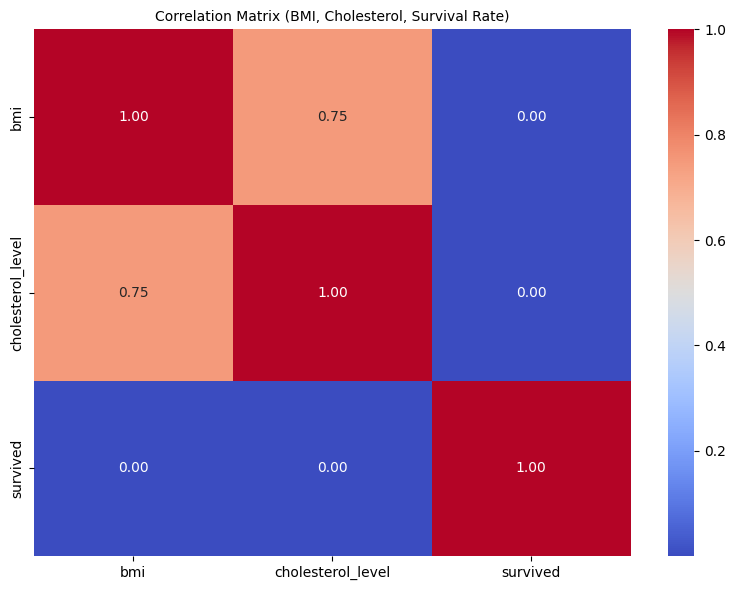

In [11]:
correlation_matrix = data[['bmi', 'cholesterol_level','survived']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (BMI, Cholesterol, Survival Rate)',fontsize=10)
plt.tight_layout()
plt.show()

**Survival Rates**

Understanding how survival rate differ accross various demographoc and clinical statergies.

In [12]:
survival_rate_by_gender    = data.groupby('gender')['survived'].mean()
survival_rate_by_gender

gender
Female    0.219913
Male      0.220545
Name: survived, dtype: float64

In [13]:
survival_rate_by_stage     = data.groupby('cancer_stage')['survived'].mean()
survival_rate_by_stage

cancer_stage
Stage I      0.218133
Stage II     0.220891
Stage III    0.220527
Stage IV     0.221366
Name: survived, dtype: float64

In [14]:
survival_rate_by_smoking   = data.groupby('smoking_status')['survived'].mean()
survival_rate_by_smoking

smoking_status
Current Smoker    0.220340
Former Smoker     0.219641
Never Smoked      0.220910
Passive Smoker    0.220025
Name: survived, dtype: float64

In [15]:
survival_rate_by_treatment = data.groupby('treatment_type')['survived'].mean()
survival_rate_by_treatment

treatment_type
Chemotherapy    0.218739
Combined        0.220126
Radiation       0.220557
Surgery         0.221499
Name: survived, dtype: float64

**VISUALIZATIONS**

The bar plot illustrates how survival rates differ across various genders, cancer stages, smoking statuses, and treatment types.

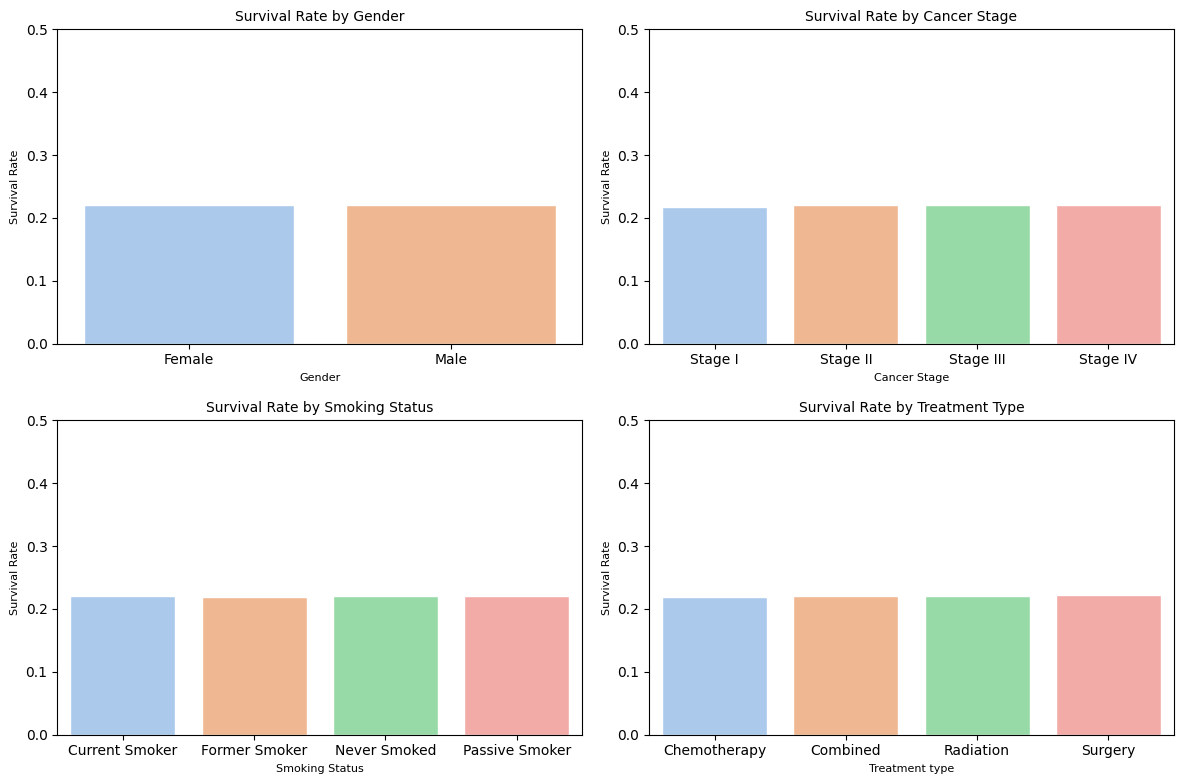

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()

sns.set(style="whitegrid")

#Plot survival rate by gender
sns.barplot(x=survival_rate_by_gender.index, y=survival_rate_by_gender.values, ax=axes[0], palette = 'pastel')
axes[0].set_title('Survival Rate by Gender', fontsize=10)
axes[0].set_ylim(0, 0.5)
axes[0].set_ylabel('Survival Rate',fontsize=8)
axes[0].set_xlabel('Gender',fontsize=8)

#Plot survival rate by cancer stage
sns.barplot(x=survival_rate_by_stage.index, y=survival_rate_by_stage.values, ax=axes[1], palette='pastel',)
axes[1].set_title('Survival Rate by Cancer Stage',fontsize=10)
axes[1].set_ylim(0, 0.5)
axes[1].set_ylabel('Survival Rate',fontsize=8)
axes[1].set_xlabel('Cancer Stage',fontsize=8)

#Plot survival rate by smoking status
sns.barplot(x=survival_rate_by_smoking.index, y=survival_rate_by_smoking.values, ax=axes[2], palette='pastel')
axes[2].set_title('Survival Rate by Smoking Status',fontsize=10)
axes[2].set_ylim(0, 0.5)
axes[2].set_ylabel('Survival Rate',fontsize=8)
axes[2].set_xlabel('Smoking Status',fontsize=8)

#Plot survival rate by treatment type
sns.barplot(x=survival_rate_by_treatment.index, y=survival_rate_by_treatment.values, ax=axes[3], palette='pastel')
axes[3].set_title('Survival Rate by Treatment Type',fontsize=10)
axes[3].set_ylim(0, 0.5)
axes[3].set_ylabel('Survival Rate',fontsize=8)
axes[3].set_xlabel('Treatment type',fontsize=8)

plt.tight_layout()
plt.show()

In [17]:
treatment_effectiveness = data.groupby('treatment_type')['survived'].mean().sort_values(ascending=False)
treatment_effectiveness

treatment_type
Surgery         0.221499
Radiation       0.220557
Combined        0.220126
Chemotherapy    0.218739
Name: survived, dtype: float64

**AGE DISTRIBUTION AMOUNG CANCER PATIENTS**

The histogram for age distribution illustrates the spread of cancer across various age brackets. This plot provides insights into which age groups are most affected by cancer, helping identify high-risk populations.

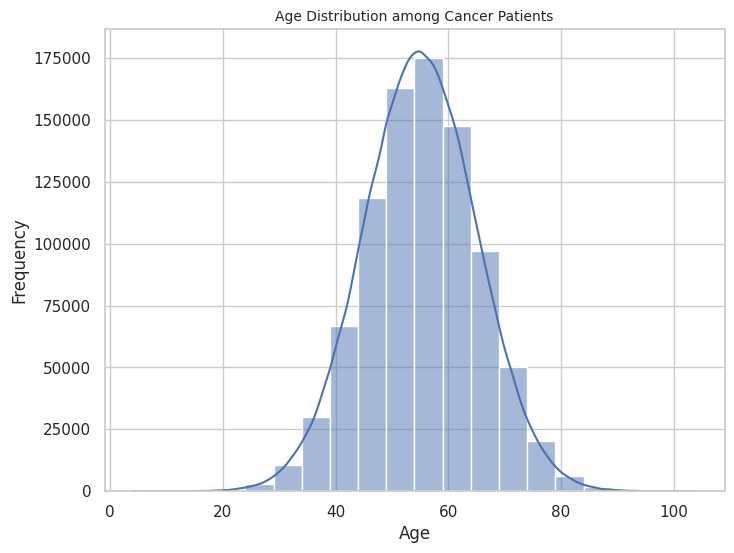

In [18]:
# Plotting Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution among Cancer Patients',fontsize=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**SURVIVAL RATE BY AGE GROUP**

Displaying a bar chart provides a comparative analysis of survival rates across three distinct age groups: young, middle-aged, and old. The aim is to identify trends in survival outcomes related to age, highlighting whether younger individuals have a better prognosis.

In [19]:
def age_categories(age):
    if age <= 30:
        return 'Young'
    elif 31 >= age <= 60:
        return 'Middle Age'
    else:
        return 'Old'

data['age_group'] = data['age'].apply(age_categories)

survival_rate_age_group = data.groupby('age_group')['survived'].mean().sort_values(ascending=False )
survival_rate_age_group

age_group
Young         0.225590
Middle Age    0.223124
Old           0.220185
Name: survived, dtype: float64

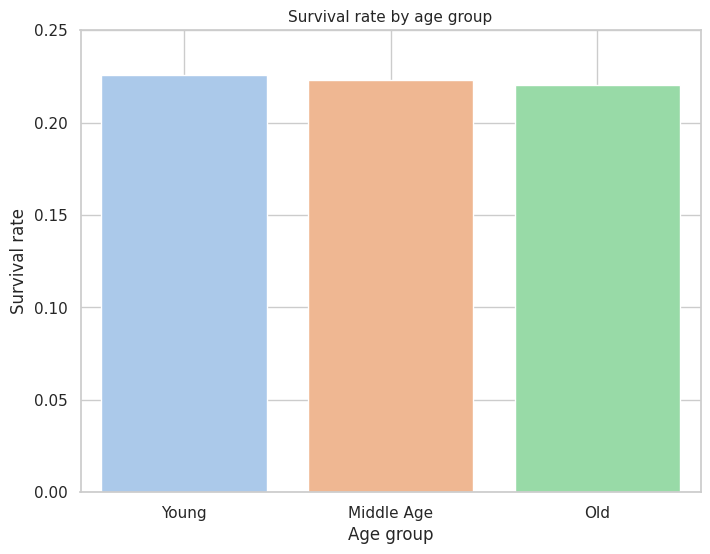

In [20]:
plt.figure(figsize=(8,6))
sns.barplot(x=survival_rate_age_group.index, y=survival_rate_age_group.values, palette ='pastel')
plt.title('Survival rate by age group', fontsize = 11)
plt.xlabel('Age group')
plt.ylabel('Survival rate')
plt.ylim(0,0.25)
plt.grid(True)
plt.show()

**SURVIVAL RATE BY TREATMENT TYPE AND AGE GROUP**

This stacked bar chart displays the survival rates segmented by treatment types (e.g., surgery, chemotherapy, radiation, or combined therapies) across the same three age groups.

In [21]:
survival_treatment_age = data.groupby(['age_group', 'treatment_type'])['survived'].mean().unstack()
survival_treatment_age

treatment_type,Chemotherapy,Combined,Radiation,Surgery
age_group,,,,
Middle Age,0.219031,0.234000,0.210648,0.227743
Old,0.218664,0.220022,0.220631,0.221425
Young,0.229454,0.230373,0.212696,0.229429


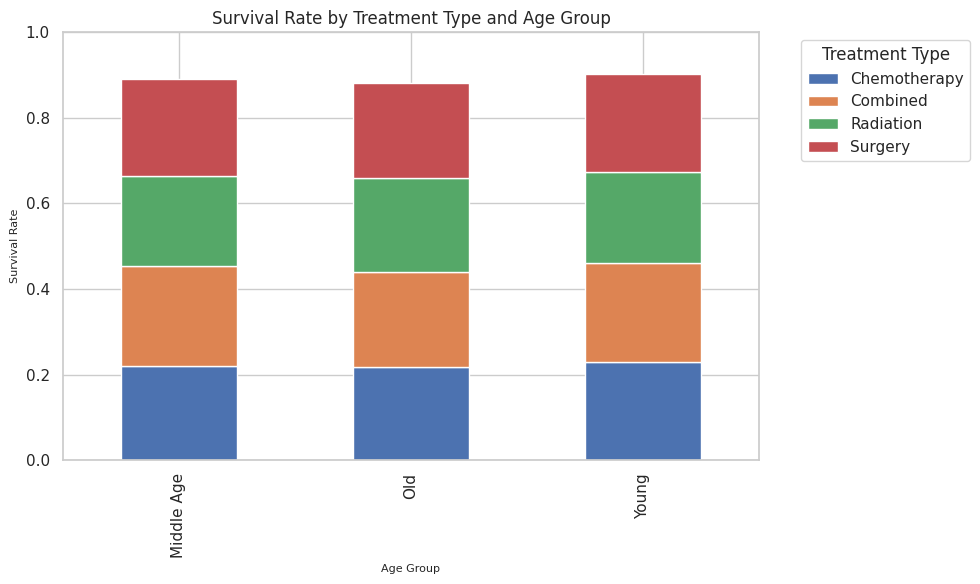

In [22]:
# Plot survival rates by treatment and age group
survival_treatment_age.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Survival Rate by Treatment Type and Age Group', fontsize=12)
plt.xlabel('Age Group', fontsize=8)
plt.ylabel('Survival Rate', fontsize=8)
plt.ylim(0, 1)
plt.legend(title='Treatment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**CANCER RATE BY COUNTRY**

The barchart displays the cancer rates among different countries in Europe.

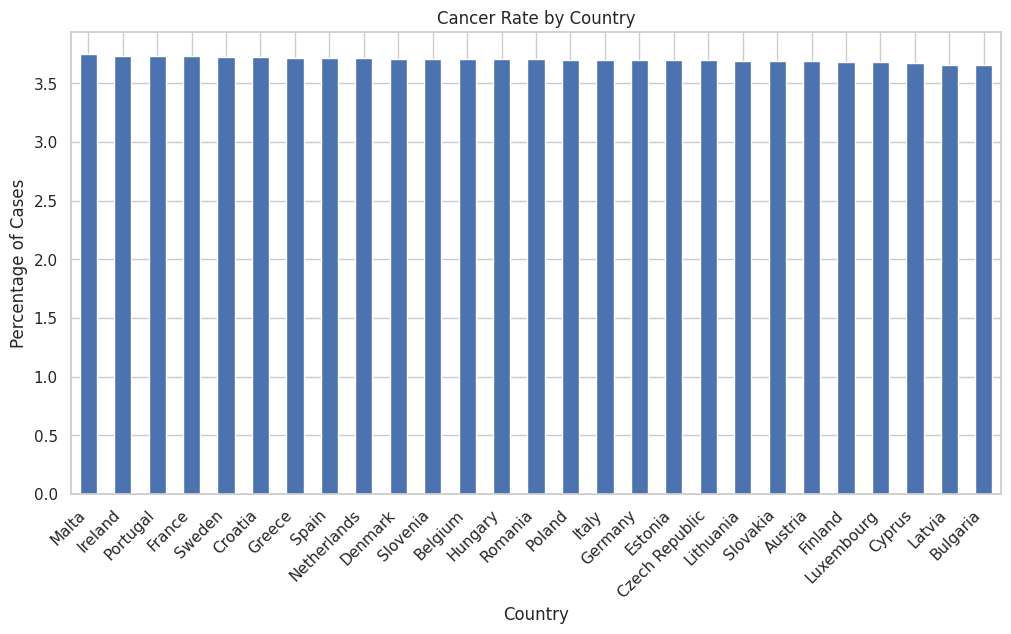

In [23]:
# Cancer Rate by Country
cancer_rate_by_country = data['country'].value_counts(normalize=True).sort_values(ascending=False) * 100

cancer_rate_by_country.plot(kind='bar', figsize=(12,6))
plt.title('Cancer Rate by Country',fontsize=12)
plt.xlabel('Country')
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=45, ha='right')
plt.show()